In [22]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading the dataset

crop_data=pd.read_csv("Crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [3]:
crop_data.shape

#rows X columns

(2200, 8)

In [4]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# dataset columns
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
crop_data.rename(columns = {'label':'Crop'}, inplace = True)
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [7]:
# statistical inference of the dataset

crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [9]:
# Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [10]:
#checking
crop_data.isnull().values.any()


False

In [11]:
crop_data.Crop.unique()

array(['Rice', 'Maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'Moth',
       'mungbean', 'Blackgram', 'Lentil', 'Pome Granet', 'Banana',
       'Mango', 'Grapes', 'Water Melon', 'muskmelon', 'Apple', 'Orange',
       'Papaya', 'Coconut', 'Cotton(lint)', 'Jute', 'Coffee'],
      dtype=object)

In [12]:
# get top 5 most frequent growing crops
n = 5
crop_data['Crop'].value_counts()[:5].index.tolist()

['Rice', 'Maize', 'Jute', 'Cotton(lint)', 'Coconut']

In [13]:
crop_data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Text(0.5, 1.0, 'correlation matrix')

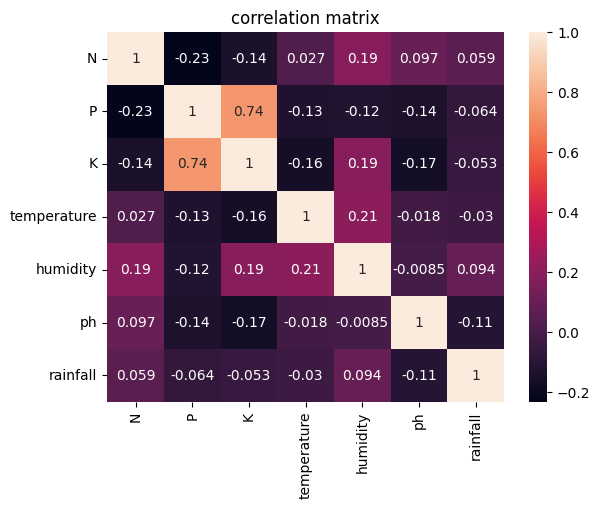

In [40]:
sns.heatmap(crop_data.corr(),annot=True)
plt.title('correlation matrix')

In [14]:
# Shuffling data to remove order effects

# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,Grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,Coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,Water Melon


In [16]:
# Selection of Feature and Target variables.

x = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']

In [17]:
# Encoding target variable 

y = pd.get_dummies(target)
y

,Apple,Banana,Blackgram,Coconut,Coffee,Cotton(lint),Grapes,Jute,Lentil,Maize,...,Orange,Papaya,Pome Granet,Rice,Water Melon,chickpea,kidneybeans,mungbean,muskmelon,pigeonpeas
1270,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1832,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1032,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2121,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# Splitting data set - 25% test dataset and 75% 


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 22)
y_test : (550, 22)


In [19]:
# Importing necessary libraries for multi-output classification

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Training

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [23]:
# Predicting test results 

forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, forest_pred)
print('Accuracy score:', accuracy_score(y_test, forest_pred))

Accuracy score: 0.98


In [25]:
from sklearn.metrics import r2_score
r = r2_score(y_test,forest_pred)
print("R2 score : ",r)

R2 score :  0.9768587049355418


In [26]:
# Calculating Adj. R2 score: 

Adjr2_11 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_11))

Adj. R-Squared : 0.9765598321210562


C:\Users\Sagar S M\AppData\Local\Temp\ipykernel_22780\523034106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\Sagar S M\AppData\Local\Temp\ipykernel_22780\523034106.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

Text(0.5, 1.0, 'random forest classifier')

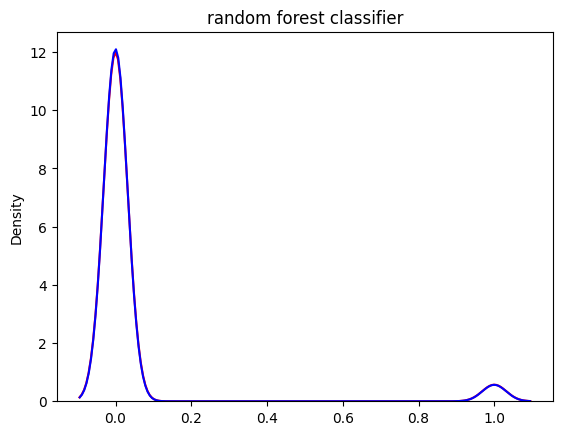

In [27]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(forest_pred, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('random forest classifier')

In [28]:
# Training
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [29]:
# Predicting test results 

decision_pred = multi_target_decision.predict(x_test)
decision_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test,decision_pred)
print('Accuracy score:', accuracy_score(y_test,decision_pred))
a2

Accuracy score: 0.9436363636363636


0.9436363636363636

In [31]:
from sklearn.metrics import r2_score
r = r2_score(y_test,decision_pred)
print("R2 score : ",r)

R2 score :  0.9397918539436287


In [32]:
# Calculating Adj. R2 score: 

Adjr2_11 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_11))

Adj. R-Squared : 0.9390142579613509


C:\Users\Sagar S M\AppData\Local\Temp\ipykernel_22780\1902935581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\Sagar S M\AppData\Local\Temp\ipykernel_22780\1902935581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

Text(0.5, 1.0, 'decision tree Regression')

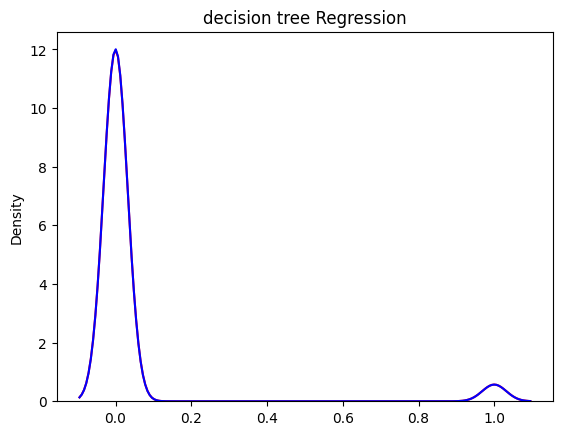

In [33]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decision_pred, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('decision tree Regression')

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
model = MultiOutputClassifier(knn_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [35]:
knn_pred = model.predict(x_test)
knn_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a3 = accuracy_score(y_test,knn_pred)
print('Accuracy score:', accuracy_score(y_test,knn_pred))
a3

Accuracy score: 0.9745454545454545


0.9745454545454545

In [37]:
from sklearn.metrics import r2_score
r = r2_score(y_test,knn_pred)
print("R2 score : ",r)

R2 score :  0.948415316721844


In [38]:
# Calculating Adj. R2 score: 

Adjr2_11 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_11))

Adj. R-Squared : 0.9477490938750781


C:\Users\Sagar S M\AppData\Local\Temp\ipykernel_22780\2193262506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\Sagar S M\AppData\Local\Temp\ipykernel_22780\2193262506.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

Text(0.5, 1.0, 'KNN')

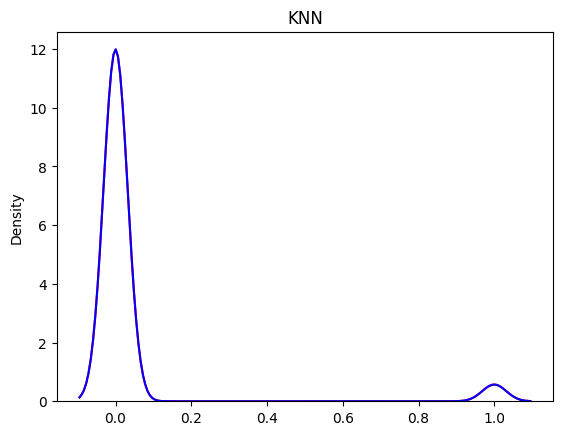

In [39]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(knn_pred, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('KNN')